In [230]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}

In [232]:
dtype = []
dtype.append( ('index', int) ) 
dtype.append( ('name', 'U200') ) 
dtype.append( ('hp', float) ) 
dtype.append( ('fire', float) ) 
dtype.append( ('ice', float) ) 
dtype.append( ('lit', float) ) 
dtype.append( ('pois', float) ) 
dtype.append( ('dark', float) ) 
dtype.append( ('holy', float) ) 
dtype.append( ('non', float) ) 
dtype.append( ('str', float) ) 

monsters = np.genfromtxt('/home/taterz/monsters.dat', dtype=dtype)
monsters

array([( 0, 'DarkImp',  600., 1.  , 1.  , 1.  , 1.  , 0.25, 1.  , 1.  , 1.  ),
       ( 1, 'Salamander',  450., 0.  , 1.  , 0.25, 1.  , 1.  , 1.  , 1.  , 0.5 ),
       ( 2, 'LowerDemon',  900., 1.  , 1.  , 1.  , 0.5 , 0.25, 1.  , 1.  , 1.  ),
       ( 3, 'DemonSmoke',  250., 0.25, 0.25, 0.25, 0.  , 0.  , 1.  , 1.  , 0.25),
       ( 4, 'FireGiant', 2800., 0.75, 1.5 , 0.5 , 1.  , 1.  , 1.  , 1.  , 1.  ),
       ( 5, 'DeathStare', 1600., 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.5 ),
       ( 6, 'FireDragon', 4500., 0.  , 1.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ),
       ( 7, 'ThunderDragon', 5000., 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  ),
       ( 8, 'FireElemental',  850., 0.  , 1.5 , 0.5 , 0.5 , 0.5 , 0.5 , 1.  , 1.  ),
       ( 9, 'EvilSpirit',  500., 0.25, 0.25, 0.25, 0.  , 0.  , 1.  , 1.  , 0.5 ),
       (10, 'FracturedSoul', 1250., 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ),
       (11, 'DarkKnight', 1400., 1.  , 1.  , 1.  , 1.  , 0.25, 1.  , 1.  , 1.  ),
       (12,

In [233]:
dtype2 = []
dtype2.append( ('index', int) ) 
dtype2.append( ('name', 'U200') ) 
dtype2.append( ('mamod', float) ) 
dtype2.append( ('bonus', float) ) 
dtype2.append( ('element', 'U200') ) 

spells = np.genfromtxt('/home/taterz/spells.dat', dtype=dtype2)
spells

array([( 0, 'Fire3',  3.,  12., 'fire'), ( 1, 'Ice3',  3.,  12., 'ice'),
       ( 2, 'Lit3',  3.,  12., 'lit'), ( 3, 'Nuke', 10., 100., 'non'),
       ( 4, 'White',  6.,  60., 'holy'), ( 5, 'Harm3',  2.,  24., 'holy'),
       ( 6, 'Poison3',  3.,  25., 'pois'),
       ( 7, 'Pearl',  7.,  60., 'non'),
       ( 8, 'Darkfire3',  3.,  50., 'dark'),
       ( 9, 'VermillionMagic',  3.,   0., 'non'),
       (10, 'VermillionMelee',  3.,   0., 'str')],
      dtype=[('index', '<i8'), ('name', '<U200'), ('mamod', '<f8'), ('bonus', '<f8'), ('element', '<U200')])

In [234]:
dtype3 = []
dtype3.append( ('index', int) ) 
dtype3.append( ('class', 'U200') ) 
dtype3.append( ('lv1will', float) ) 
dtype3.append( ('lv1str', float) ) 
dtype3.append( ('lvupwill', float) ) 
dtype3.append( ('lvupstr', float) ) 

classes = np.genfromtxt('/home/taterz/classes.dat', dtype=dtype3)
classes

array([(0, 'Redmage',  7., 8., 2., 2.), (1, 'Bluemage',  8., 6., 3., 2.),
       (2, 'Whitemage',  9., 7., 3., 2.),
       (3, 'Blackmage', 10., 6., 3., 1.)],
      dtype=[('index', '<i8'), ('class', '<U200'), ('lv1will', '<f8'), ('lv1str', '<f8'), ('lvupwill', '<f8'), ('lvupstr', '<f8')])

In [235]:
LV = np.arange(1, 101, 1); staff = 200; rapier = 170     #level range as applicable to bonus stats

Spell damage is considered by it's absolute minimum damage.

In [238]:
def hit_test(monsters, spells, classes, weapon, bp):
    """ Determines the hit thresholds for the monster in question for the higher tier spells and creates a
    graph to represent the hit thresholds. Will also return the hit values if they exist.
    
    'monsters' monsters index from the monsters array
    
    'spell' spell you wish to use to check (based of natural or full bonus points entry)
    'classes' array entry containing the class to check, it must match the spell choice
    'weapon' is the weapon's minimum magic/attack value
    'bp' bonus points placed into the relevant stat
    """
    statmod = classes[4]*LV + bp + weapon
    damage = spells['mamod'] * statmod + spells['bonus']
    element = spells['element']
    damage = damage * monsters[element]
    
    hitcount = 1 - (monsters['hp'] - damage)/monsters['hp']

    plt.plot(LV, hitcount, 'k')
    plt.axhline(y=1/4, color='b')               #4 hits
    plt.axhline(y=1/3, color='b')               #3 hits
    plt.axhline(y=1/2, color='b')               #2 hits
    plt.axhline(y=1, color='b')                  #1 hit
    plt.grid()
    
    fourhit = hitcount > 1/4
    threehit = hitcount > 1/3
    twohit = hitcount > 1/2
    onehit = hitcount > 1

    if hitcount[fourhit].size > 0:
        print('Minimum 4-hit level: ', len(LV) - len(damage[fourhit]))
        print('Magic/attack rating of: ', statmod[len(LV) - len(damage[fourhit])])
    
    if hitcount[threehit].size > 0:
        print('Minimum 3-hit level: ', len(LV) - len(damage[threehit]))    
        print('Magic/attack rating of: ', statmod[len(LV) - len(damage[threehit])])

    if hitcount[twohit].size > 0:
        print('Minimum 2-hit level: ', len(LV) - len(damage[twohit]))
        print('Magic/attack rating of: ', statmod[len(LV) - len(damage[twohit])])
    
    if hitcount[onehit].size > 0:
        print('Minimum 1-hit level: ', len(LV) - len(damage[onehit]))
        print('Magic/attack rating of: ', statmod[len(LV) - len(damage[onehit])])


Minimum 4-hit level:  0
Magic/attack rating of:  253.0
Minimum 3-hit level:  0
Magic/attack rating of:  253.0
Minimum 2-hit level:  0
Magic/attack rating of:  253.0
Minimum 1-hit level:  0
Magic/attack rating of:  253.0


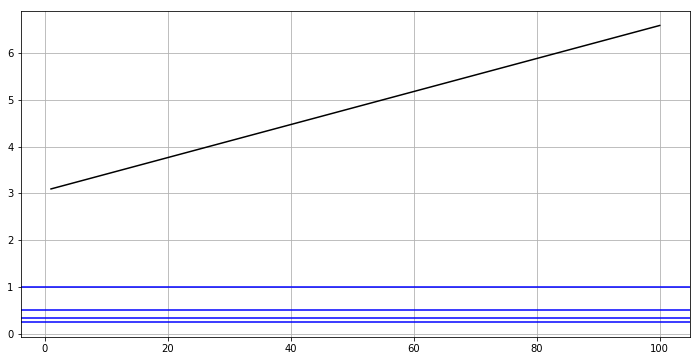

In [240]:
hit_test(monsters[8], spells[3], classes[3], staff, 50)